<a href="https://colab.research.google.com/github/cesaroliveiragoes/Statistics-for-Data-Science/blob/main/class_16_Teste_F_Correlacao_(27_10_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste F e Correlação

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# biblioteca estatistica
from scipy.stats import f, f_oneway

#Carregar Dados


In [ ]:
dados_salarios =  pd.read_csv('dados_salarios.csv')
dados_salarios


,cidade,salarios
0,A,3464.338550
1,A,3914.463351
2,A,2136.661666
3,A,3027.615130
4,A,4429.408854
5,A,4047.846284
6,A,1908.180306
7,A,1264.525840
8,A,1734.662448
9,A,3712.818657


In [ ]:
dados_dietas = pd.read_csv('dados_dietas.csv', sep = ';')
dados_dietas

,id,dieta,perda_peso_kg
0,1,baixa_caloria,8
1,2,baixa_caloria,9
2,3,baixa_caloria,6
3,4,baixa_caloria,7
4,5,baixa_caloria,3
5,6,baixa_gordura,2
6,7,baixa_gordura,4
7,8,baixa_gordura,3
8,9,baixa_gordura,5
9,10,baixa_gordura,1


In [ ]:
dados_bolsa = pd.read_csv('dados_bolsa.csv', sep = ';', decimal = ',')
dados_bolsa

,data,petr4,bbdc3,vale5,ambv4,itub4
0,2004-05-26,-0.002270,0.009524,0.013699,0.032668,0.009843
1,2004-05-27,0.026301,0.028396,0.028303,0.014060,0.021442
2,2004-05-28,-0.016484,-0.000092,-0.025261,0.019151,0.000000
3,2004-05-31,0.010986,-0.009174,0.011235,-0.001786,0.000000
4,2004-06-01,0.028142,0.023056,-0.004518,0.013629,0.012107
...,...,...,...,...,...,...
1773,2011-03-14,0.003905,-0.000407,-0.002139,-0.010953,0.004765
1774,2011-03-15,-0.008487,0.004473,-0.016724,-0.004873,0.011994
1775,2011-03-16,-0.009272,-0.017409,-0.025294,-0.020699,-0.023705
1776,2011-03-17,0.010799,-0.001236,0.027293,-0.001136,-0.005364


# Exemplos

Exemplo 1 - Dados Salários

In [ ]:
dados_salarios.groupby('cidade') \
               .agg(media_salarial = pd.NamedAgg('salarios', 'mean'),
                    dp_salarial = pd.NamedAgg('salarios','std'),
                    n = pd.NamedAgg('salarios', 'count')) \
                    .reset_index()

,cidade,media_salarial,dp_salarial,n
0,A,2964.052109,1117.505582,10
1,B,2432.859069,1342.126772,15


Separar os dados dos grupos

In [ ]:
gra = dados_salarios[dados_salarios['cidade'] == 'A']['salarios']

In [ ]:
grb = dados_salarios[dados_salarios['cidade'] == 'B']['salarios']

Realizar teste F

In [ ]:
f_valor = np.var(gra, ddof = 1) / np.var(grb, ddof = 1)
f_valor

0.6932858292724237

In [ ]:
gla = len(gra) - 1
glb = len(grb) - 1
gla, glb

(9, 14)

In [ ]:
def f_p_value(f_statistic, df_n, df_d, test_type):

  '''test_type: greater, less, two.sided'''

  if test_type == 'greater':
    return 1 - f.cdf(f_valor, df_n, df_d)
  elif test_type == 'less':
    return f.cdf(f_valor, df_n, df_d)
  elif test_type == 'two.sided':
    p1 = f.cdf(f_valor, df_n, df_d)
    p2 = 1 - f.cdf(f_valor, df_n, df_d)
    return np.min([p1, p2])*2
  else:
    raise TypeError("'test_type' only accept options: 'greater', 'less' or 'two.sided'")

In [ ]:
p_value = f_p_value(f_valor, gla, glb, 'two.sided')
p_value

0.5895222755367536

In [ ]:
f_valor, p_value

(0.6932858292724237, 0.5895222755367536)

In [ ]:
# decisão: Há evidencias para não rejeitar a hipótese nula

## Exemplo 2 - Dados das dietas

In [ ]:
dados_dietas.groupby('dieta') \
               .agg(media_perdapeso = pd.NamedAgg('perda_peso_kg', 'mean'),
                    dp_perdapeso = pd.NamedAgg('perda_peso_kg','std'),
                    n = pd.NamedAgg('perda_peso_kg', 'count')) \
                    .reset_index()

,dieta,media_perdapeso,dp_perdapeso,n
0,baixa_caloria,6.6,2.302173,5
1,baixa_gordura,3.0,1.581139,5
2,baixo_carboidrato,3.4,1.140175,5
3,grupo_controle,1.2,1.643168,5


<Axes: title={'center': 'perda_peso_kg'}, xlabel='dieta'>

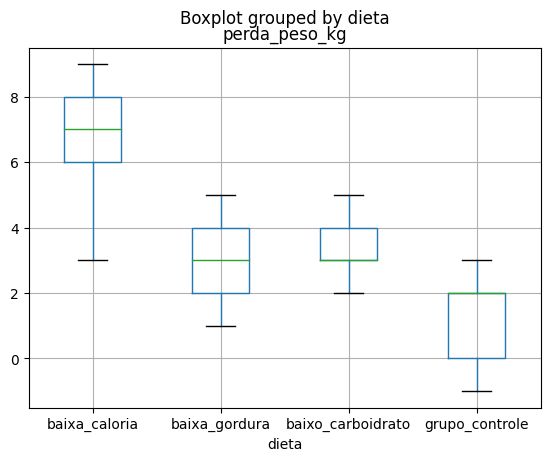

In [ ]:
dados_dietas.boxplot(column='perda_peso_kg', by = 'dieta')

In [ ]:
bc = dados_dietas[dados_dietas['dieta'] == 'baixa_caloria']['perda_peso_kg']
bg = dados_dietas[dados_dietas['dieta'] == 'baixa_gordura']['perda_peso_kg']
bcab = dados_dietas[dados_dietas['dieta'] == 'baixo_carboidrato']['perda_peso_kg']
gc = dados_dietas[dados_dietas['dieta'] == 'grupo_controle']['perda_peso_kg']

In [ ]:
f_oneway(bc, bg, bcab, gc)

F_onewayResult(statistic=8.559322033898304, pvalue=0.0012777417892066623)

In [ ]:
# Decisao Rejeita Hipótese Nula

# Dados Bolsa

In [ ]:
dados_bolsa[dados_bolsa.isnull()]

,data,petr4,bbdc3,vale5,ambv4,itub4
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1773,NaN,NaN,NaN,NaN,NaN,NaN
1774,NaN,NaN,NaN,NaN,NaN,NaN
1775,NaN,NaN,NaN,NaN,NaN,NaN
1776,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados_bolsa = dados_bolsa.dropna()

In [ ]:
cols_correl = ['data', 'petr4', 'bbdc3', 'vale5', 'ambv4', 'itub4']
correlacoes = dados_bolsa[cols_correl].corr()

<ipython-input-44-8b6edf6d2c24>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = dados_bolsa[cols_correl].corr()


In [ ]:
# heatmap
correlacoes.style.background_gradient(cmap = 'coolwarm').set_precision(2)

<ipython-input-46-22b01841f195>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlacoes.style.background_gradient(cmap = 'coolwarm').set_precision(2)


,petr4,bbdc3,vale5,ambv4,itub4
petr4,1.00,0.54,0.72,0.39,0.59
bbdc3,0.54,1.00,0.59,0.47,0.78
vale5,0.72,0.59,1.00,0.48,0.64
ambv4,0.39,0.47,0.48,1.00,0.49
itub4,0.59,0.78,0.64,0.49,1.00
